In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
# Define paths
train_dir = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth_Dataset\Training"
validation_dir = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth_Dataset\Validation"
test_dir = r"C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\Anaconda\Teeth_Dataset\Testing"

In [36]:
# Separate generator for pre-augmented (original) images - only normalization
original_datagen = ImageDataGenerator(rescale=1./255)
# Define image size and batch size
image_size = (224, 224) 
batch_size = 16
# Original images generator (no augmentation)
original_generator = original_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
)

Found 3087 images belonging to 7 classes.


In [38]:

# Initialize ImageDataGenerator with normalization and augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=15,  # Reduced augmentation: Rotate images up to 15 degrees
    width_shift_range=0.1,  # Reduced augmentation: Shift width
    height_shift_range=0.1,  # Reduced augmentation: Shift height
    shear_range=0.1,  # Reduced augmentation: Shear transformations
    zoom_range=0.1,  # Reduced augmentation: Zoom in/out
    horizontal_flip=True,  # Augmentation: Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)
# No augmentation for validation/test, only normalization
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']  # Specify the 7 classes you want to include
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']  # Specify the 7 classes you want to include
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [40]:
import numpy as np

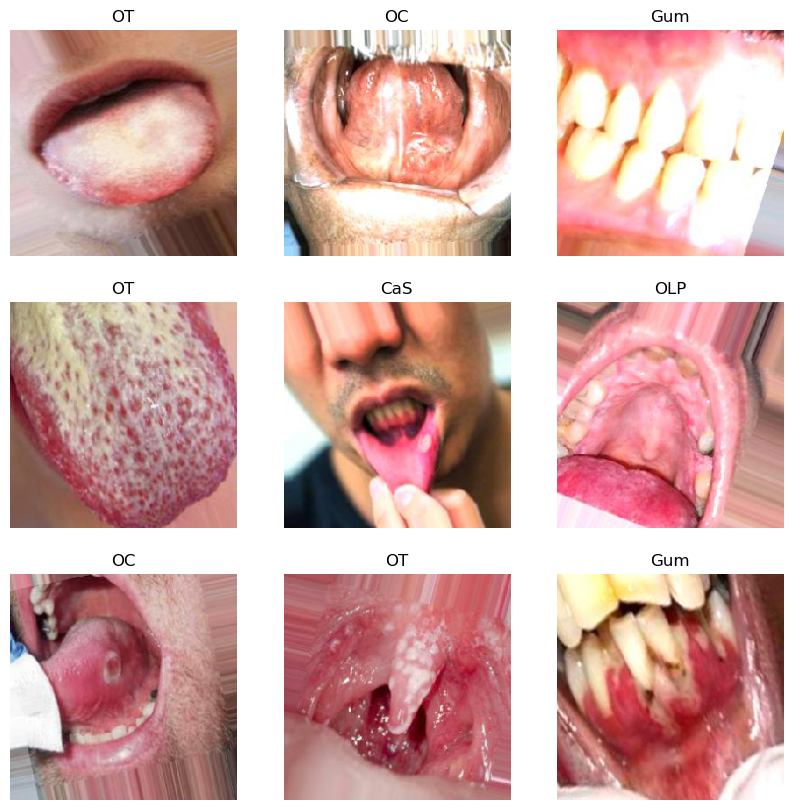

In [42]:
# Get a batch of images and labels from the original (pre-augmented) generator
images, labels = next(original_generator)

# Extract class labels from the generator
class_labels = list(original_generator.class_indices.keys())

# Plot a few original (pre-augmented) images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    
    # Convert one-hot encoding to class index
    label_index = np.argmax(labels[i])
    
    # Set the correct class name as the title
    plt.title(class_labels[label_index])
    
    plt.axis('off')
plt.show()


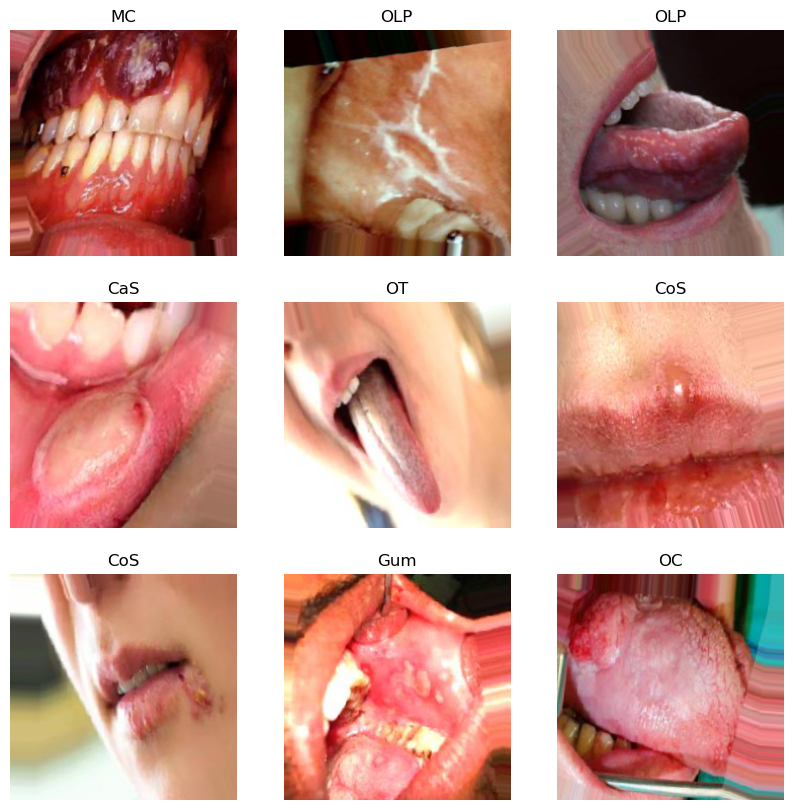

In [44]:
# Get a batch of images and labels with augmentation applied
augmented_images, augmented_labels = next(train_generator)

# Plot a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i])
    
    # Convert one-hot encoding to class index
    label_index = np.argmax(augmented_labels[i])
    
    # Set the correct class name as the title
    plt.title(class_labels[label_index])
    
    plt.axis('off')
plt.show()

In [46]:
from tensorflow.keras.optimizers import Adam
# Define a slightly more complex CNN model using Sequential API
model = Sequential([
    # First Convolutional Block
    Input((224, 224, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third Convolutional Block (Newly added for more complexity)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),    
    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),  # Increased Dense layer size for more complexity
    Dropout(0.125),
    Dense(128, activation='relu'),  # Increased Dense layer size for more complexity
    Dropout(0.125),
    
    # Output Layer
    Dense(7, activation='softmax')  # 7 classes for teeth classification task
])

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,850,087 (18.50 MB)

 Trainable params: 4,850,087 (18.50 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the train_generator and validation_generator
history = model.fit(
    train_generator,
    epochs=60,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add early stopping
)


Epoch 1/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 51s 243ms/step - accuracy: 0.2159 - loss: 1.9065 - val_accuracy: 0.2490 - val_loss: 1.8338
Epoch 2/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.2843 - loss: 1.7740 - val_accuracy: 0.3638 - val_loss: 1.6328
Epoch 3/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.3833 - loss: 1.5906 - val_accuracy: 0.4932 - val_loss: 1.3355
Epoch 4/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 47s 240ms/step - accuracy: 0.4405 - loss: 1.4327 - val_accuracy: 0.5282 - val_loss: 1.2710
Epoch 5/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 50s 251ms/step - accuracy: 0.5000 - loss: 1.3179 - val_accuracy: 0.5924 - val_loss: 1.1099
Epoch 6/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.5629 - loss: 1.1692 - val_accuracy: 0.6333 - val_loss: 0.9857
Epoch 7/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.6043 - loss: 1.0813 - val_accuracy: 0.6070 - val_loss: 1.0620
Epoch 8/60
193/193 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.6479 - loss: 0

In [51]:
# Evaluate the model using the test_generator
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9657 - loss: 0.1012
Test Accuracy: 0.97


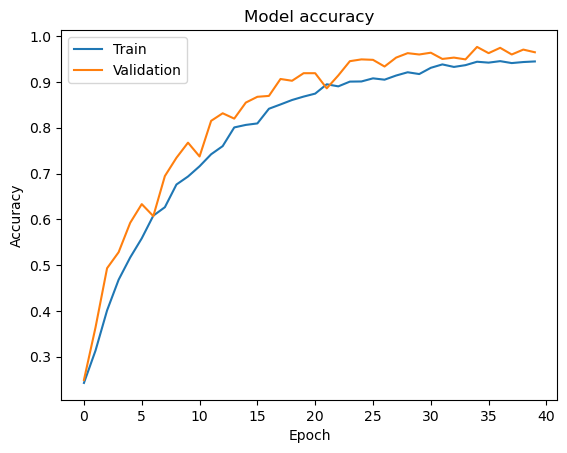

In [52]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

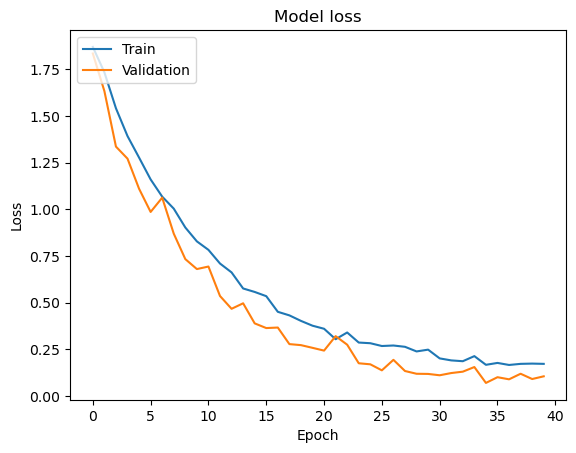

In [53]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()